It is considered a beam of 13.00 m central span with two cantilevers of 6.00 meters. The cross section is formed by a flange 1.00 meter wide and 0.10 m thick. The web is 0.17 meters wide.
The total height of the beam is 0.45 m. The beam in the supports is reinforced in the upper face with 8fi16 bars, two of which are within 17 cm of the web.

![beam](EX3.png)

The structure is subject to the following actions:
- Self weight of the beam
- Dead load consisting of two railings of 0.5 kN/m weight each, which will be assumed to be located at the edge of the section
- Live load of 4.0 kN/m²
Geometric cover of the reinforcements is 30 mm.

It is requested:
1. Shear reinforcement in critical sections
2. Shear reinforcement between web and flanges




In [4]:
from structuralcodes.materials.concrete import ConcreteEC2_2004,ConcreteEC2_2023
from structuralcodes.materials.reinforcement import ReinforcementEC2_2023, ReinforcementEC2_2004
from shapely import Polygon
from structuralcodes.geometry import SurfaceGeometry,CompoundGeometry
from structuralcodes.sections._reinforcement import (
    add_reinforcement,
    add_reinforcement_line,
)
from structuralcodes.sections._generic import GenericSection
from structuralcodes.plots.section_plots import draw_section
import math
from structuralcodes.codes.ec2_2004 import shear

Cross section

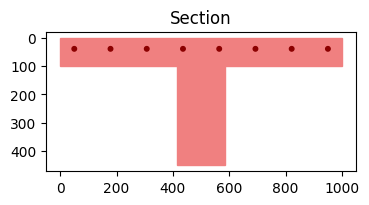

In [5]:
# Materials
fi =2.5
concrete = ConcreteEC2_2004(25)
reinforcemnet = ReinforcementEC2_2004(fyk=500, Es=200000, density=7850, ftk=550, epsuk=0.07)  
# Create section
poly = Polygon(((0, 0), (1000, 0), (1000, 100), (500+170/2, 100),(500+170/2, 450),(500-170/2, 450),(500-170/2, 100),(0,100)))
geo = SurfaceGeometry(poly, concrete)
geo = add_reinforcement_line(geo, (50, 30+16/2), (950, 30+16/2), 16, reinforcemnet,n=8)
sec = GenericSection(CompoundGeometry([geo]))
draw_section(sec,"Section")



$V_{ED}$:



![Beam](EX3_beamV.png)
![Beam](EX3_beamM.png)

![Ved_pos](EX3_ved_pos.png)
![Ved_neg](EX3_ved_neg.png)

In [6]:
sw = sec.gross_properties.mass  * 10 # kN/m2
dead_load = 2*0.5 # kN/m2
live_load = 4 # kN/m2
cover = 30 # mm


q = (1.35*(sw+dead_load)+1.5*(4)) # kN/m
d = (450-30-16/2)/1000 # m
ved_left = q*(6-d)
ved_right = 89.2 - q*d
print(f'Ved left section = {round(ved_left,1)} kN')
print(f'Ved right section = {round(ved_right,1)} kN')




Ved left section = 70.9 kN
Ved right section = 84.0 kN


In [7]:
bw=170 #mm
z = 0.9*(450-30-16/2) #mm
print(z)
theta = 21.8 #º 
ac=z*bw


# compression strut
vrd_max= shear.VRdmax(bw,z,concrete.fck,theta,0,ac,concrete.fcd())/1000 # kN
print(f'Vrd_max = {round(vrd_max)} kN')

# Required transversar reinforcement strut
# asw_max_s = shear.Asw_max(concrete.fcd(),concrete.fck,bw,1,500/1.15,0,ac) *10  # cm2/m
asw_left = ved_left /z/500*1e6*1.15/(1/math.tan(math.radians(theta))) /100  # cm2/m
asw_right = ved_right /z/500*1e6*1.15/(1/math.tan(math.radians(theta))) /100  # cm2/m
print(f'Required transversal reinf. left section = {round(asw_left,2)} cm2/m')
print(f'Required transversal reinf. right section = {round(asw_right,2)} cm2/m')



370.8
Vrd_max = 196 kN
Required transversal reinf. left section = 1.76 cm2/m
Required transversal reinf. right section = 2.08 cm2/m
